# Helper Functions

In [1]:
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords

def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    words = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text)]
    return ' '.join(words)

# Load data

In [2]:
import csv

filenames = ['good.csv', 'bag_dataset.csv', 'bottle_dataset.csv']

train_data = []
train_classif = []
for filename in filenames:
    with open(filename, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        fields = ['title', 'material']
        # combine text from fields
        for row in csv_reader:
            text = ''
            for field in fields:
                text += row[field]
            train_data.append(preprocess(text.decode('utf8')))
            train_classif.append(row['target'])

In [3]:
# import csv

# with open('data/good.csv', 'r') as csv_file:
#     train_data = [{k: int(v) for k, v in row.items()} for row in csv.DictReader(csv_file)]
# print train_data[0]

# Bag of words

In [4]:
# count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_data)
train_counts.shape

(880, 1430)

# Feature importance 

## Trees

1430
129 aluminum
1209 steel
591 gift
1357 vacuum
724 jute
968 paper
201 beach
1205 stainless
598 glass
714 jewelry
Feature ranking:
1. feature 129 (0.040435)
2. feature 1209 (0.033539)
3. feature 591 (0.028191)
4. feature 1357 (0.026420)
5. feature 724 (0.022654)
6. feature 968 (0.021622)
7. feature 201 (0.018794)
8. feature 1205 (0.016756)
9. feature 598 (0.015252)
10. feature 714 (0.014559)


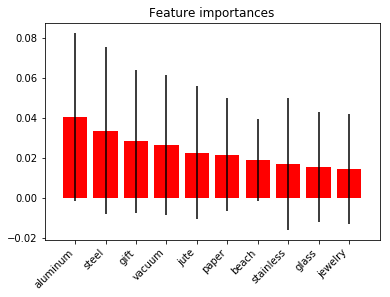

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = train_counts
y = train_classif

print X.shape[1]

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# get top features
indices = indices[:10]
vocab_flip = {y:x for x,y in count_vect.vocabulary_.iteritems()}
for index in indices:
    print index, vocab_flip[index]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(10), [vocab_flip[index] for index in indices], rotation = 45, ha="right")
plt.xlim([-1, 10])
plt.show()

# Train classifier and pickle


In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(train_counts, train_classif)

# pickle classifier and count vectorizer
from sklearn.externals import joblib
joblib.dump(classifier, 'lr_model.joblib')
joblib.dump(count_vect, 'count_vect.joblib')

['count_vect.joblib']

# Predict from pickled model

In [17]:
docs_new = ['jute paper aluminum']

# load classifier and count vectorizer from pickle file
classifier = joblib.load('lr_model.joblib')
count_vect = joblib.load('count_vect.joblib')

new_counts = count_vect.transform(docs_new)
predicted = classifier.predict_proba(new_counts)

print predicted

[[0.01353943 0.98646057]]


# Experiments

In [154]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)


In [155]:
len(twenty_train.data)
print twenty_train.data[0]

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



(2257, 35788)